# PLANE CRASH! WHO DIED AND WHEN?
## by Joy Mundia

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython import display
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

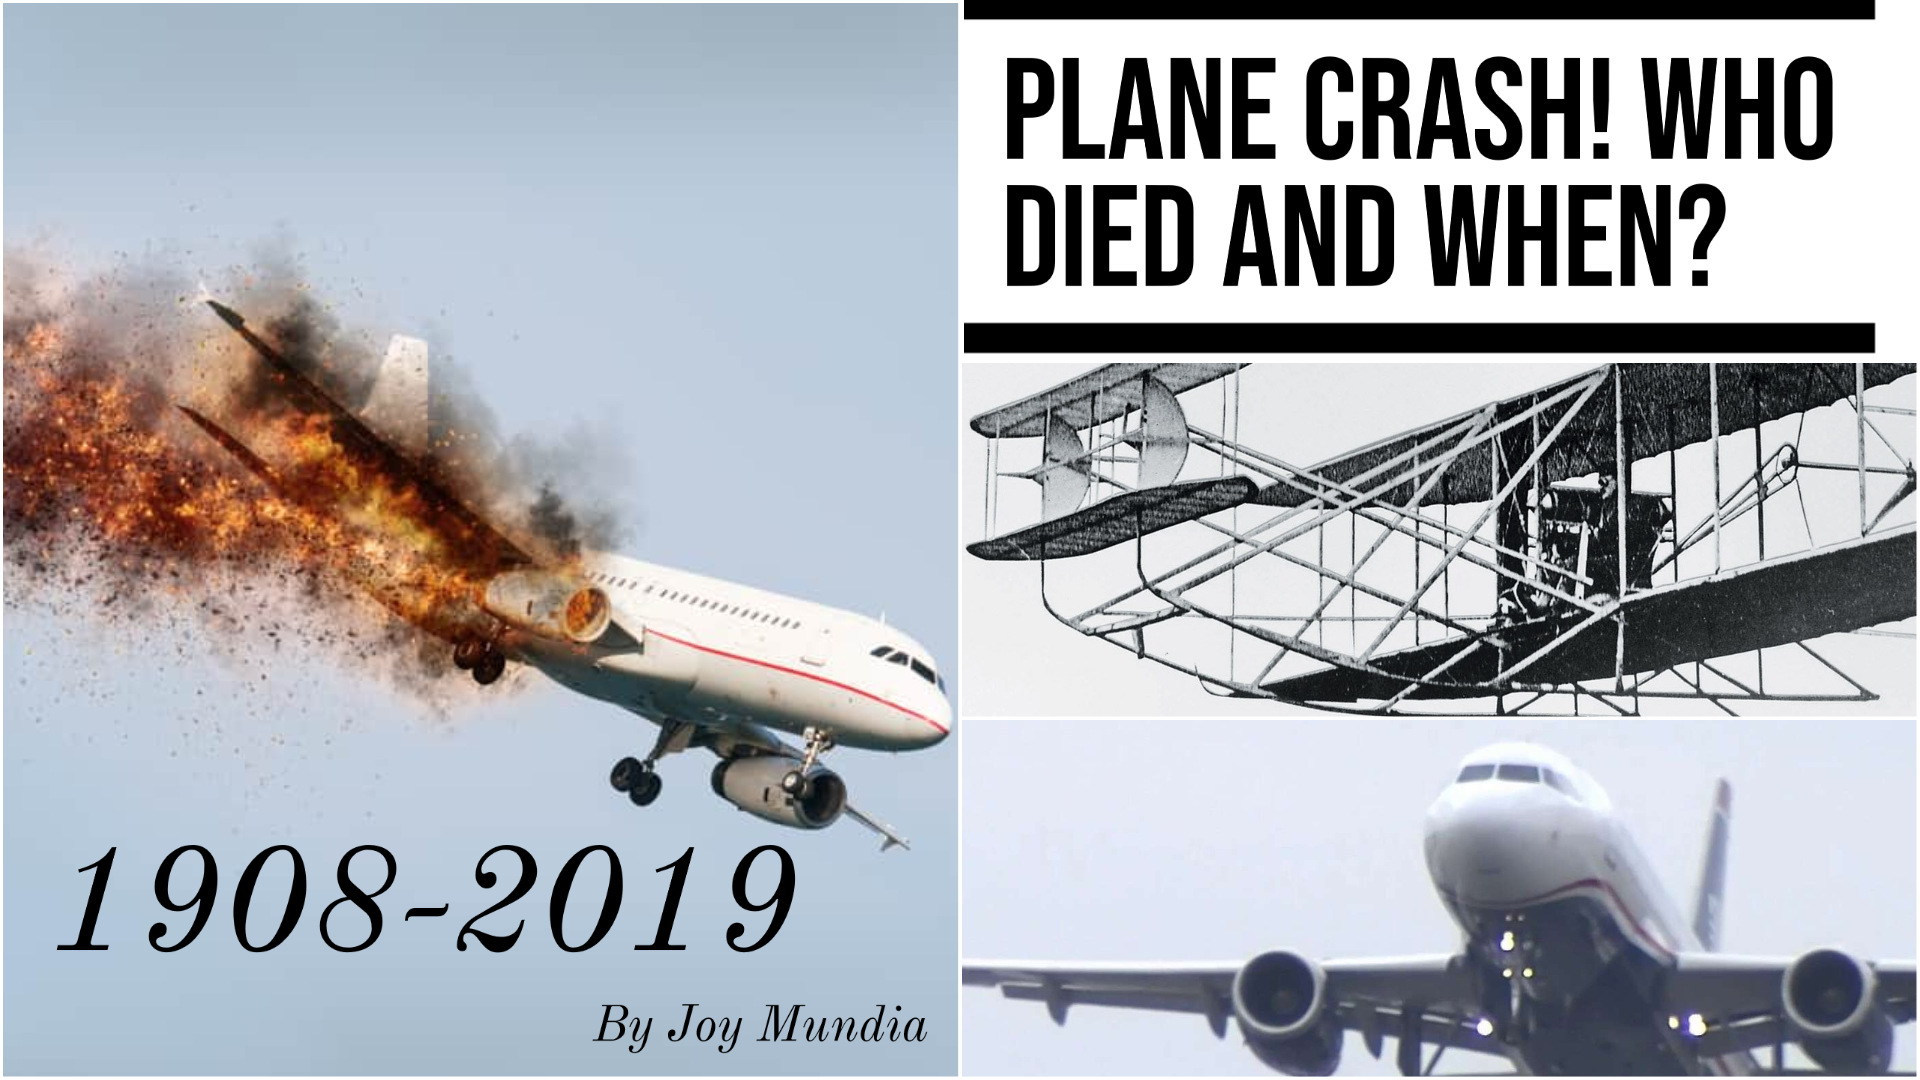

In [2]:
cover = display.Image("My project-1(7).jpg")
cover


## Investigation Overview

Using 100+ years worth of data, this investigation sought to discover what percentage of plane crash accidents were fatal. Were plane crew members at risk of dying in a fatal plane crash as opposed to the passengers? Were certain months more prone to fatalities than others? And generally, have we seen a reduction in plane crashes over the years? 


## Dataset Overview

The dataset covered 4962 plane crash instances. As this was historical data, interpolation and forward-fill were used to fill in any missing values. As most investigation centered around fatalities, columns such as registraation number were dropped, as they did not show to be instrumental for investigation. For plane crash summary reasons, a new dataframe was created from the summary column, consisting of word count. As this dataframe was created manually, it was liable to human error. To avoid falsifying information, numerical values associated with the word count were left out in the visualization, and a sequential palette was used instead to show the degree of frequency. 

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('plane_crashes.csv')

## What is the general summary? Out of all who were onboard, What percentage were fatalities?
Plane crashes are known to be deadly, but if we could quantify them, what percentage of people would be casualties? Unfortunately, well over 70% of candidates onboard a flight that ended in a plane crash, would be a fatality. Less than 30% would survive,passengers and plane crew included.

In [4]:
sns.set(font_scale=1.4,rc={'figure.figsize':(20,7)})
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

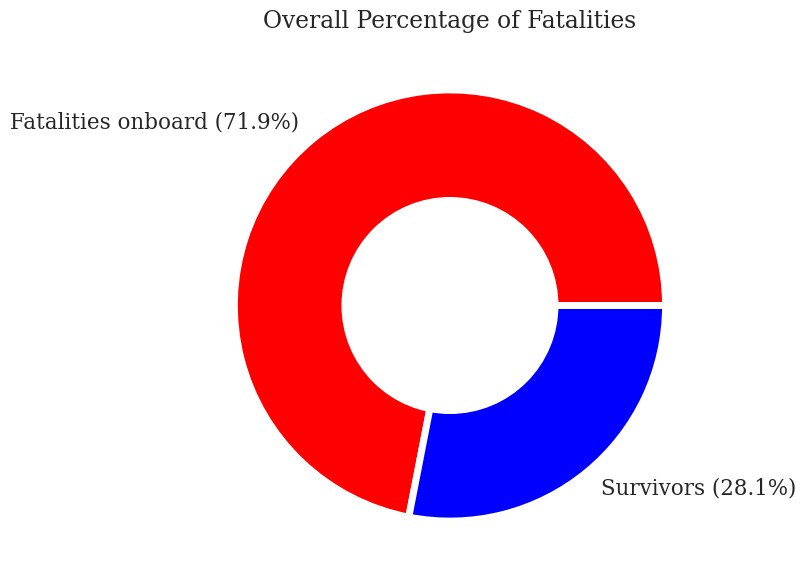

In [5]:
def fatal_donut(values,names,title):
    my_circle = plt.Circle( (0,0), 0.5, color='white')
    plt.pie(x = values, labels=names,colors=['red','blue'], wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title)
    plt.show()
    
# Overall summary
all_aboard = df['Aboard'].sum()
total_fatal = df['Fatalities'].sum()
fatal_out_of_aboard = round((total_fatal / all_aboard) * 100, 2)
fatal_out_of_aboard

names = ['Fatalities onboard (71.9%)', 'Survivors (28.1%)']
fatal_out_of_aboard = [71.94,28.06]

overall = fatal_donut(fatal_out_of_aboard,names,"Overall Percentage of Fatalities")

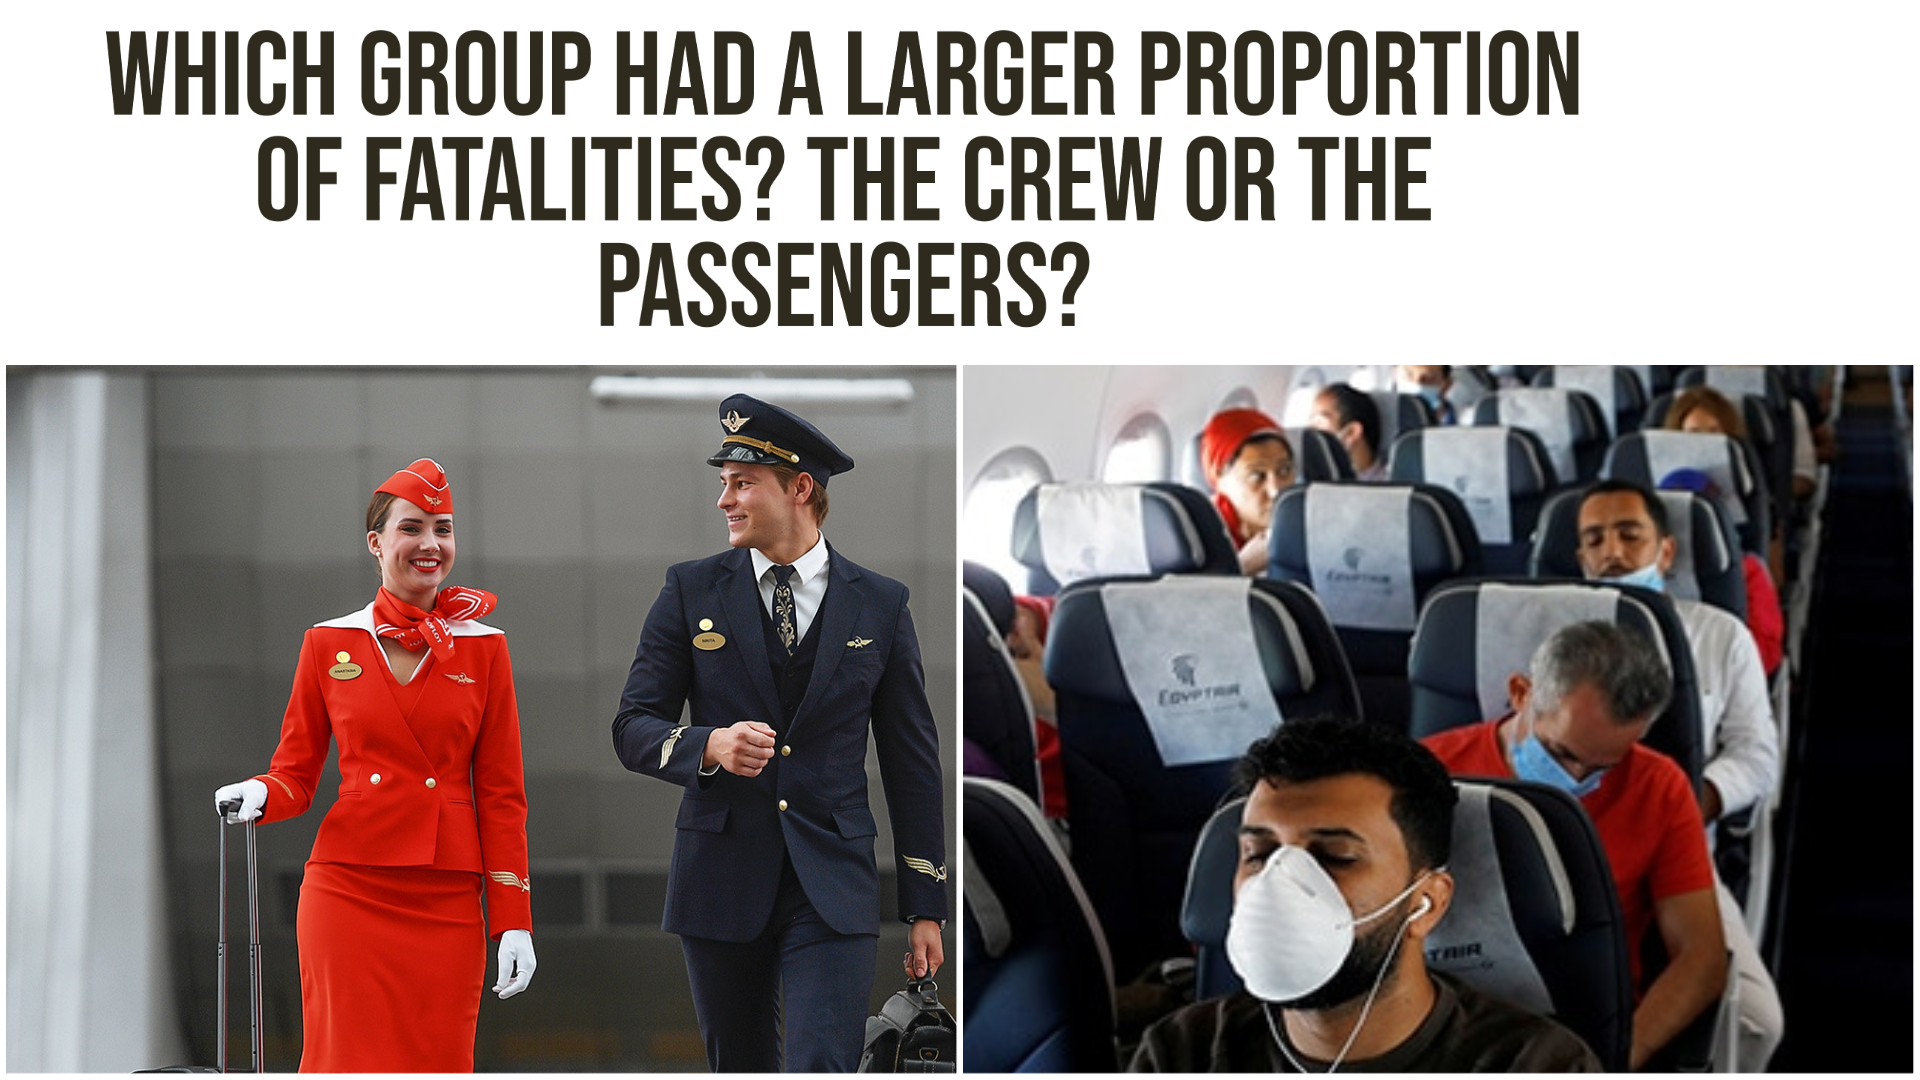

In [6]:
group = display.Image("My project-1(4).jpg")
group

Given the staggering results about the overall fatality rate, a deeper dive into who was more susceptible to dying in a plane crash was imperative. From the results, the plane crew had an approximate 10% higher chance of becoming a fatality as compared to the passengers. Perhaps this may be due to the fact that they would be in the front lines assisting passengers  while putting their very own lives at risk.

In [7]:
# Passenger summary
passenger_aboard = df['Aboard Passangers'].sum()
total_fatal_pass = df['Fatalities Passangers'].sum()
fatal_out_of_aboard_pass = round((total_fatal_pass / passenger_aboard) * 100, 2)
fatal_out_of_aboard_pass

pass_names = ['Passenger Fatalities onboard (70.5%)', 'Survivors (29.5%)']
pass_fatal_out_of_aboard = [70.52,29.48]

# Crew summary
crew_aboard = df['Aboard Crew'].sum()
total_fatal_crew = df['Fatalities Crew'].sum()
fatal_out_of_aboard_crew = round((total_fatal_crew / crew_aboard) * 100, 2)
fatal_out_of_aboard_crew

Crew_names = ['Crew Fatalities onboard (80.2%)', 'Survivors (19.8%)']
crew_fatal_out_of_aboard = [80.23,19.77]

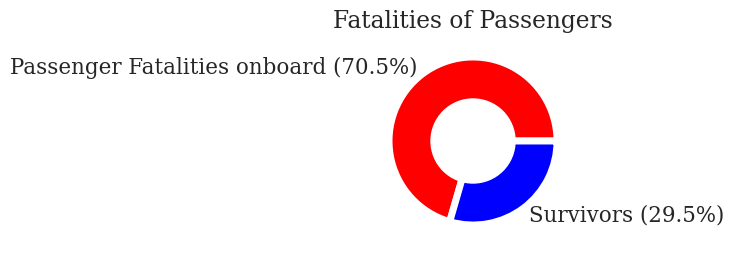

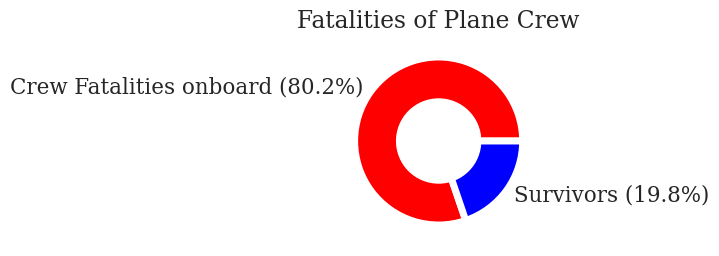

In [8]:
fig = plt.figure(figsize=(6, 6))

plt.subplot(2, 1, 1)
passenger = fatal_donut(pass_fatal_out_of_aboard,pass_names, "Fatalities of Passengers")

fig = plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 2)
crew = fatal_donut(crew_fatal_out_of_aboard,Crew_names,"Fatalities of Plane Crew")

plt.show()

## Out of the Fatalities, what percentage of plane crashes claimed everybody onboard?
In the event of a fatal plane crash, what are the odds of the entire plane being killed? passengers and crew included.An estimated 64% of all plane crashes would wipe out everybody on board. This tends to be of more of a concern because more than 50% of all plane crash accidents would have absolutely no survivors. Not to be confused with the previous statistics which discusses overall probability of a fatality occuring.

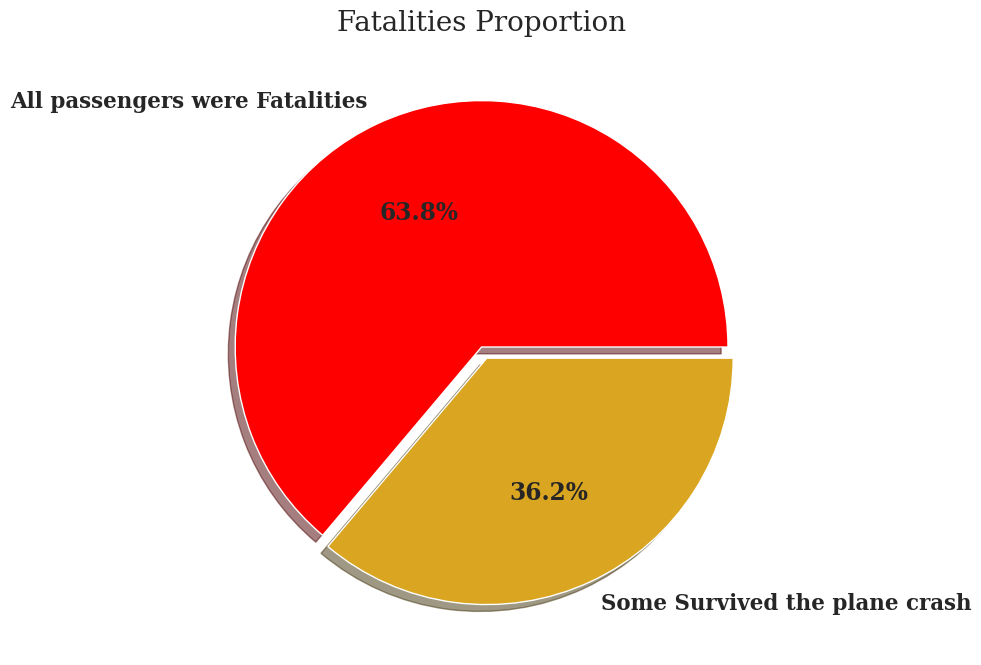

In [9]:
colors = ['red','goldenrod']
labels = ['All passengers were Fatalities','Some Survived the plane crash']
text_props = {"weight": "bold"}
explode = [0,0.05]
fig = plt.figure(figsize=(8, 8))

plt.pie(df['all_died'].value_counts(),colors=colors,autopct='%1.1f%%',labels=labels,textprops=text_props,explode=explode,shadow=True)
plt.title("Fatalities Proportion",fontsize = 20);

## Of the two groups (Crew, Passengers), Which group was more likely to have everybody in the group killed in the plane crash?
If we could isolate the passengers and bunch them into one group and do the same for the plane crew, which group would have a higher chance of having all its members wiped out, and by how much more? Unsurprisingly, the plane crew would stand a greater chance of being wiped out. However what is shocking is how this is possible by only a small margin of 5%. 

In [10]:
passenger = df.groupby(['all_died'])['Fatalities Passangers'].sum().to_frame()
passenger

Fatalities Passangers
all_died                       
False                   28999.0
True                    64992.0

In [11]:
total_pass_die = 28999.0 + 64992.0
false_percent_pass = round((28999.0 / total_pass_die) * 100,2)
true_percent_pass = round((64992.0 / total_pass_die) * 100,2)
print ("false_die_pass:",false_percent_pass," , ","true_die_pass:",true_percent_pass)

false_percent_pass = str(false_percent_pass) + "%"
true_percent_pass = str(true_percent_pass) + "%"

false_die_pass: 30.85  ,  true_die_pass: 69.15


In [12]:
crew = df.groupby(['all_died'])['Fatalities Crew'].sum().to_frame()
crew

Fatalities Crew
all_died                 
False              4617.0
True              13341.0

In [13]:
total_crew_die = 4617.0 + 13341.0
false_percent_crew = round((4617.0 / total_crew_die) * 100,2)
true_percent_crew = round((13341.0 / total_crew_die) * 100,2)
print ("false_die_crew:",false_percent_crew," , ","true_die_crew:",true_percent_crew)

false_percent_crew = str(false_percent_crew) + "%"
true_percent_crew = str(true_percent_crew) + "%"

false_die_crew: 25.71  ,  true_die_crew: 74.29


In [14]:
sns.set(font_scale=1)
cmap = ['goldenrod','red']
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
colors = ['red','goldenrod']

df.groupby(['all_died'])['Fatalities Passangers'].sum().plot.bar(
    ax=axes[0], color = cmap
)
for container in axes[0].containers:
    labels = [false_percent_pass,true_percent_pass]
    axes[0].bar_label(container,labels=labels)

axes[0].set_title("Passenger Fatalities Distribution", fontsize=14)

df.groupby(['all_died'])['Fatalities Crew'].sum().plot.bar(
    ax=axes[1], color = cmap
)
for container in axes[1].containers:
    labels = [false_percent_crew,true_percent_crew]
    axes[1].bar_label(container,labels=labels)
axes[1].set_title("Crew Fatalities Distribution", fontsize=14)
plt.subplots_adjust(wspace=.5, hspace=.9)

plt.suptitle("Comparison of fatalitites distribution between Passengers and crew");

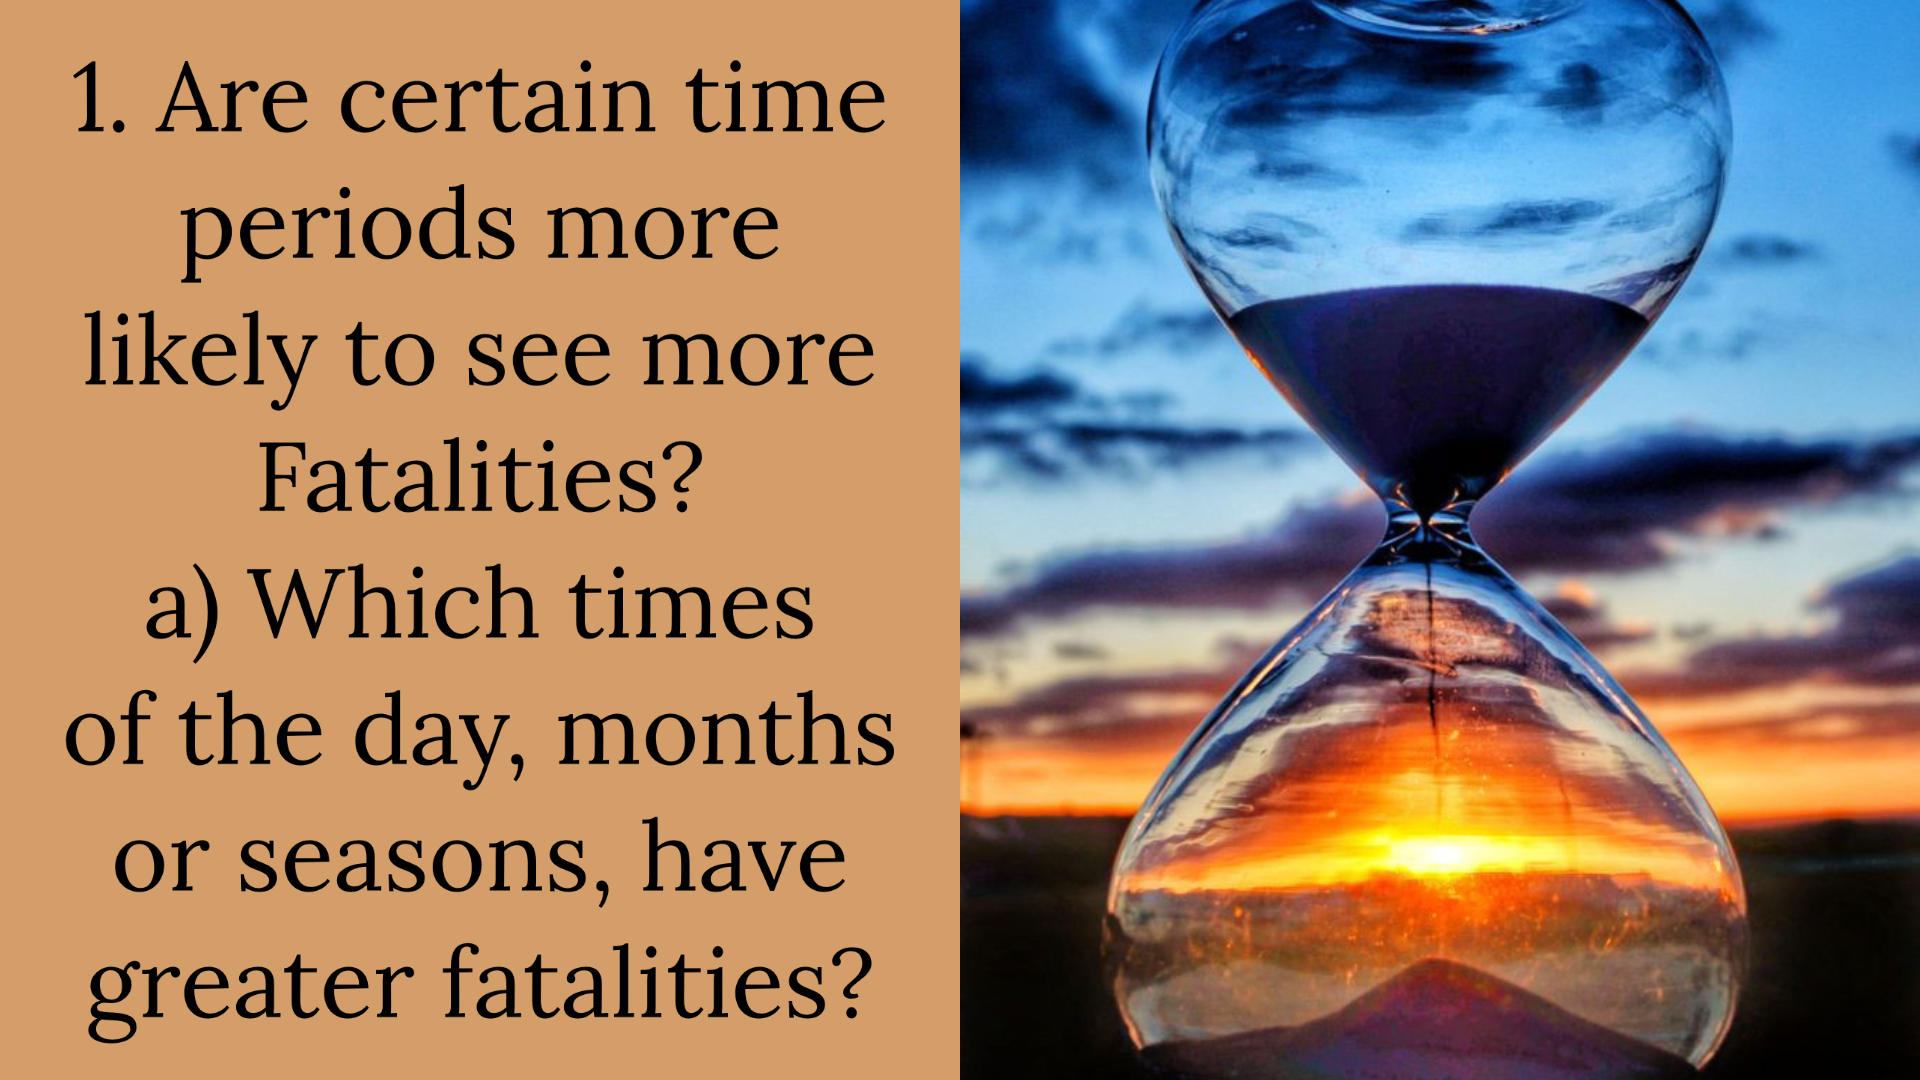

In [15]:
time = display.Image("My project-1(5).jpg")
time

## Which times of the day have greater fatalities?
It appears the fatalities increase as we move from morning to night,with evening having higher figures.However no logical explanation could explain this. 

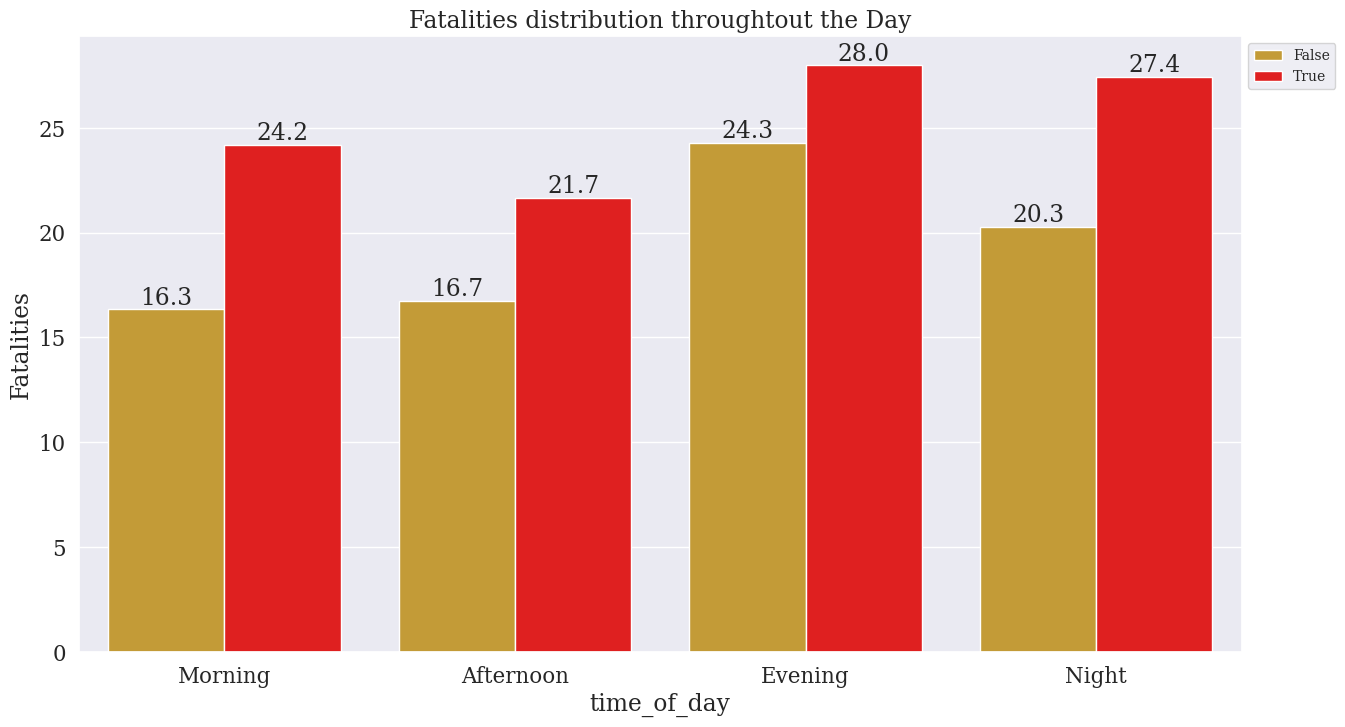

In [16]:
sns.set(font_scale=1.4,rc={'figure.figsize':(15,8)})
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
hue_colors = {False:'goldenrod',True: 'red'}
ax = sns.barplot(data = df, x = 'time_of_day', y = 'Fatalities', hue = 'all_died',palette = hue_colors, order = ['Morning','Afternoon','Evening','Night'], ci=None)
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.title("Fatalities distribution throughtout the Day");

## Which seasons see the highest number of fatalities?
Summer and Autumn compete for high fatality count. However Summer takes the crown with a measly 1.2% higher rate. Ironically on closer inspection, Autumn has the least chances of survival during a plane crash. During Summer, extreme temperatures may interfer with the planes physics of flying, and Autumn is known for its dense fog. Perhaps the fog outweighs the extreme temperatures and poses a bigger threat.

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize = [20, 8])
plt.subplot(1, 2, 1)

ax = sns.barplot(x= 'Season', y='Fatalities',data = df,color = 'crimson', ci=None )
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.title("Fatalities over the seasons",fontsize = 20)

cmap = ['goldenrod','red']
plt.subplot(1, 2, 2)
colors = ['red','goldenrod']
ax = sns.barplot(x= 'Season', y='Fatalities',data = df, hue = 'all_died',palette = hue_colors, ci=None )
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.title("Fatalities over the seasons",fontsize = 20)
plt.show()

## Which months of the year have more fatalities?
The Summer months undoubtly contribute significantly to increased fatality count. But of the four seasons, spring months have generally the least fatalities in comparison to the winter months.

In [18]:
sns.set(font_scale=1.4,rc={'figure.figsize':(18,9)})
hue_colors = {False:'goldenrod',True: 'red'}
order = ['March','April','May','June','July','August','September','October','November','December','January','February']
ax = sns.barplot(data = df, x = 'month', y = 'Fatalities', hue = 'all_died',palette = hue_colors, ci=None, order = order)

for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
    
ax.vlines(x = 2 , ymin = 0 , ymax = 38, color = ['darkolivegreen'], label = "End of Spring, Summer start",linewidth=3.0,linestyles='dashed')
ax.vlines(x = 5 , ymin = 0 , ymax = 38, color = ['m'], label = "End of Summer, Autum start",linewidth=3.0,linestyles='dashed')
ax.vlines(x = 8 , ymin = 0 , ymax = 38, color = ['midnightblue'], label = "End of Autum, Winter start",linewidth=3.0,linestyles='dashed')

ax.text(0.5, 38, 'Spring',color = "midnightblue", fontsize=15)
ax.text(3, 38, 'Summer',color = "midnightblue", fontsize=15)
ax.text(6, 38, 'Autum',color = "midnightblue", fontsize=15)
ax.text(10, 38, 'Winter',color = "midnightblue", fontsize=15)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.title("Fatalities distribution throughout the Month",fontsize = 20)
plt.xticks(rotation=45);

## Have the fatalities reduced or increased over the years?
It appears the fatalities have increased over the years, but this may be due to increased number of flights.However what is depicted is the fact that most plane crashes have killed everybody on board over the years, and this continues to spike as the years go by. Extreme spikes could also have been created during data handling, hence the authenticity of this graph can not be determined.

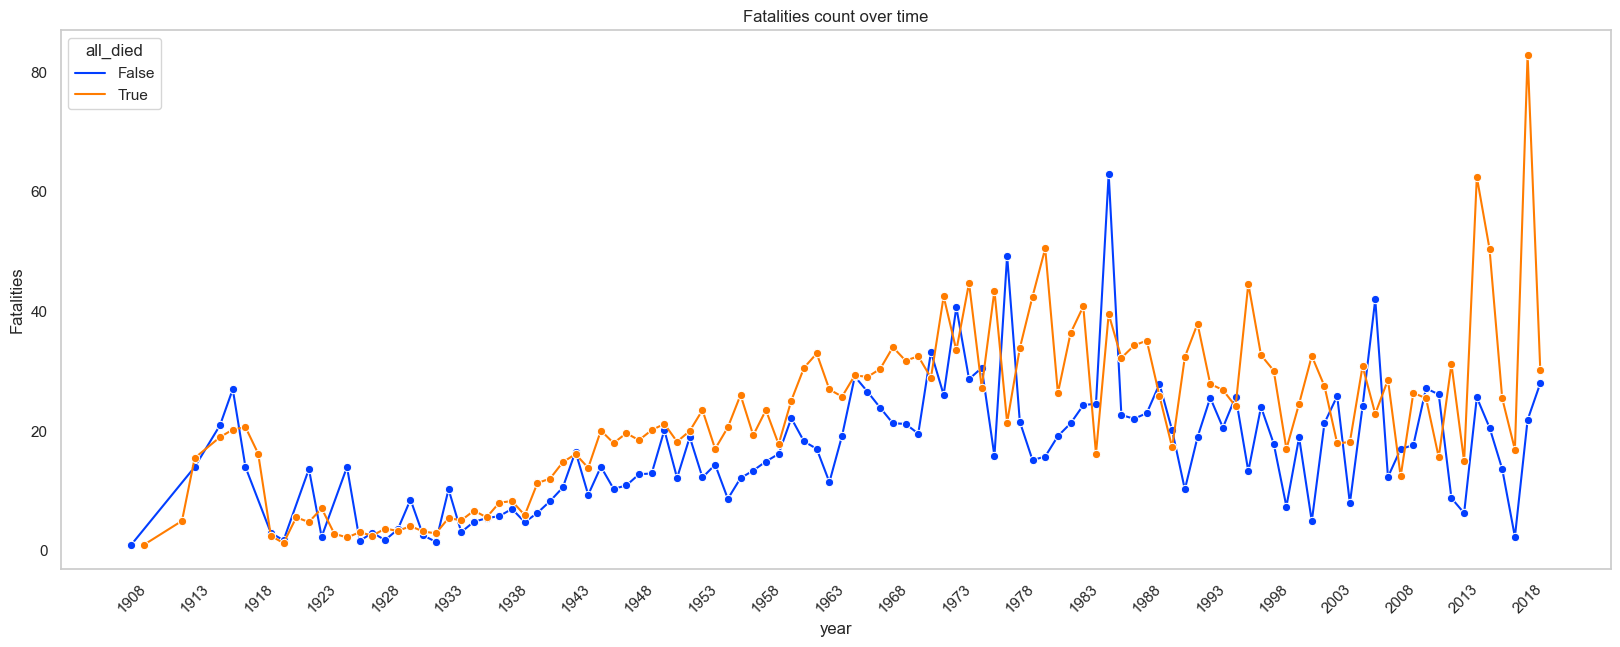

In [19]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_style("whitegrid",{'axes.grid' : False})
year=sns.lineplot(
    data=df,
    x=df["year"],
    y="Fatalities",
    hue="all_died",
    palette="bright",
    ci = None,
    marker="o"
)
year.set_title("Fatalities count over time")
plt.xticks(np.arange(df['year'].min(), df['year'].max()+3, 5))
plt.xticks(rotation = 45)
plt.show();

## What seems to be the major reasons for these fatalitites?
Opting to use a word count, brought to the surface more reasons that could have been behind the plane crashes.On closer inspection, it can be noticed that reasons may overlap, and one reason may be behind the other that caused the plane crash. At the top is runway accidents.Most reports stated, plane crashes occured shortly after leaving the runway or coming short of it during landing. Engine and structural issues came in as a frequent report. Some structural issues included the tail wing catching fire. Poor weather contributed sigificantly to fatalities, in most, it was not only a primary reason, but a secondary reason as well. One that could certainly be avoidable was perhaps pilot error. Miscalculations or poor judgment resulted in disaster. Thankfully with the rise of aviation bodies, this reason may soon be close to insignificant in the coming years, as technology has evolved to take over tasks prone to human error, including flying a plane.

In [20]:
df["reasons"] = df['Summary'].str.lower().str.replace('[^\w\s]','')
 
 
new_df = df.reasons.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.head()

# Reference https://predictivehacks.com/?all-tips=word-counts-in-pandas-data-frames

Word  Frequency
0  the      18213
1   of       5455
2    a       5421
3  and       5395
4   to       5389

In [21]:
#Tons pf experimenting and manual search
new_df.iloc[5:40]
new_df.iloc[40:60]
new_df.iloc[60:80]
new_df.iloc[80:100]

Word  Frequency
80      one        299
81      low        298
82   pilots        293
83      out        291
84     area        286
85   caused        280
86      its        275
87  terrain        275
88  minutes        273
89    about        265
90    power        261
91      sea        258
92  descent        239
93       he        239
94    heavy        238
95    trees        238
96    below        237
97  captain        236
98      his        235
99   before        226

In [22]:
#Searching for word context, manual search
pd.set_option('display.max_colwidth', 500)
df["Summary"].loc[df["Summary"].str.contains("engine", case=False, na=False)].head()

5     Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft..
38                                                                  The aircraft suffered engine failure and crashed shortly after taking off.
39                                                       Crashed while taking off after engine failure. Engine failure due to fuel exhaustion.
43                                               The pilot crashed after attempting to make an emergency landing after the engine caught fire.
50                                                                                     The aircraft stalled and crashed when an engine failed.
Name: Summary, dtype: object

In [23]:
#Creating new dataframe based on word count
#Disclaimer, results are liable to human error
top_10_reason_dict = {"runway accidents":857,
            "engine issues":773,
            "structural failure":708,
            "landing gone wrong":611,
            "poor weather":488,
            "loss of control":479,
            "takeoff accidents":427,
            "Crashed while en route":309,
            "ran out of fuel":274,"Pilot error":271}

reasons = pd.DataFrame(list(top_10_reason_dict.items()), columns = ['Plane crash reason','Frequency'])
reasons

Plane crash reason  Frequency
0        runway accidents        857
1           engine issues        773
2      structural failure        708
3      landing gone wrong        611
4            poor weather        488
5         loss of control        479
6       takeoff accidents        427
7  Crashed while en route        309
8         ran out of fuel        274
9             Pilot error        271

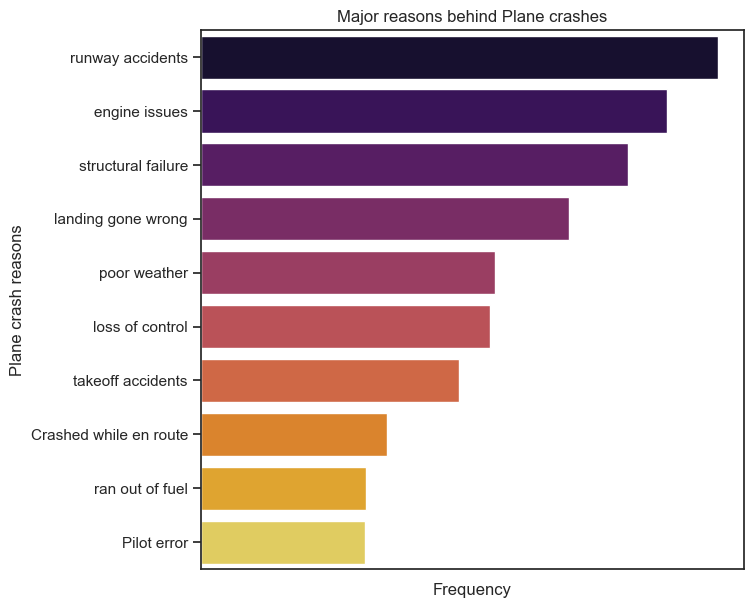

In [24]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style('ticks')
ax =sns.barplot(
        data=reasons,
        x = "Frequency",
        y="Plane crash reason",
        palette = 'inferno'
)

ax.set_xlabel('Frequency')
ax.set_ylabel('Plane crash reasons')
ax.set_title('Major reasons behind Plane crashes')
ax.set_xticks([]) #Removing xticks as the quantities are not of accurate measure but approximations

plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [27]:
!jupyter nbconvert Part_II_slide_deck_project_3.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_project_3.ipynb to slides
[NbConvertApp] Writing 6042758 bytes to Part_II_slide_deck_project_3.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 